In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from cdasws import CdasWs
import datetime

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

cdas = CdasWs()

nT_to_T = 1e-9
per_cmCubic_to_per_mCubic = 1e6
mu_0 = 4*np.pi*1e-7
m_proton = 1.6726219*1e-27
eV_to_Kelvin = 11604.5250061598
R_earth = 6371

In [2]:
selected_events = pd.read_pickle('selected_events.pkl')

In [3]:
# selected_events.to_pickle('selected_events.pkl')
# use it if necessary.
# after using please comment out.

In [12]:
initialize = True
if initialize:
#     selected_events['V_proton_x_GSE_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['proton_density_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['proton_speed_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['proton_temperature_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['alpha_density_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['electron_density_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['electron_speed_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['electron_temperature_3DP'] = [np.nan,]*len(selected_events)
#     
#     selected_events['x_GSE_WIND'] = [np.nan,]*len(selected_events)
#     selected_events['y_GSE_WIND'] = [np.nan,]*len(selected_events)
#     selected_events['z_GSE_WIND'] = [np.nan,]*len(selected_events)
#     selected_events['x_GSE_ACE'] = [np.nan,]*len(selected_events)
#     selected_events['y_GSE_ACE'] = [np.nan,]*len(selected_events)
#     selected_events['z_GSE_ACE'] = [np.nan,]*len(selected_events)
#     selected_events['proton_density_SWE'] = [np.nan,]*len(selected_events)
#     selected_events['proton_speed_SWE'] = [np.nan,]*len(selected_events)
#     selected_events['proton_temperature_SWE'] = [np.nan,]*len(selected_events)
#     selected_events['alpha_density_SWE'] = [np.nan,]*len(selected_events)
#     selected_events['alpha_density_SWI'] = [np.nan,]*len(selected_events)
#     selected_events['C6toC5_ratio_SWI'] = [np.nan,]*len(selected_events)
#     selected_events['O7toO6_ratio_SWI'] = [np.nan,]*len(selected_events)
#     selected_events['Q_avg_Fe_SWI'] = [np.nan,]*len(selected_events)
#     selected_events['SW_type_SWI'] = [np.nan,]*len(selected_events)
#     selected_events['B_total_WIND'] = [np.nan,]*len(selected_events)
#     selected_events['B_total_ACE'] = [np.nan,]*len(selected_events)
    pass
# selected_events.iloc[0]

In [9]:
i_event = 0
t_start, t_end = selected_events.iloc[i_event][:2]
t_start_localize = t_start.tz_localize(tz='UTC')
t_end_localize = t_end.tz_localize(tz='UTC')

# WIND 3DP-PLSP

In [10]:
%%time
variables_3DP = ['FLUX','FLUX_STACKED','ENERGY','MOM.P.SC_CURRENT','MOM.P.MAGF','MOM.P.DENSITY','MOM.P.AVGTEMP','MOM.P.VTHERMAL','MOM.P.VELOCITY','MOM.P.FLUX','MOM.P.PTENS','MOM.P.MFTENS','MOM.P.T3','MOM.P.SYMM','MOM.P.SYMM_THETA','MOM.P.SYMM_PHI','MOM.P.SYMM_ANG','MOM.P.MAGT3','MOM.P.ERANGE','MOM.P.MASS','MOM.P.VALID','MOM.P.VEL_MAG','MOM.P.VEL_TH','MOM.P.VEL_PHI','MOM.A.SC_CURRENT','MOM.A.MAGF','MOM.A.DENSITY','MOM.A.AVGTEMP','MOM.A.VTHERMAL','MOM.A.VELOCITY','MOM.A.FLUX','MOM.A.PTENS','MOM.A.MFTENS','MOM.A.T3','MOM.A.SYMM','MOM.A.SYMM_THETA','MOM.A.SYMM_PHI','MOM.A.SYMM_ANG','MOM.A.MAGT3','MOM.A.ERANGE','MOM.A.MASS','MOM.A.VALID','MOM.A.VEL_MAG','MOM.A.VEL_TH','MOM.A.VEL_PHI','TIME']
status_3DP, data_3DP = cdas.get_data('WI_PLSP_3DP', variables_3DP, t_start_localize, t_end_localize)

print(data_3DP.keys())
# there is magnetic field interpolated to the epoch of protons

dict_keys(['Epoch', 'FLUX', 'FLUX_STACKED', 'ENERGY', 'MOM$P$SC_CURRENT', 'MOM$P$MAGF', 'MOM$P$DENSITY', 'MOM$P$AVGTEMP', 'MOM$P$VTHERMAL', 'MOM$P$VELOCITY', 'MOM$P$FLUX', 'MOM$P$PTENS', 'MOM$P$MFTENS', 'MOM$P$T3', 'MOM$P$SYMM', 'MOM$P$SYMM_THETA', 'MOM$P$SYMM_PHI', 'MOM$P$SYMM_ANG', 'MOM$P$MAGT3', 'MOM$P$ERANGE', 'MOM$P$MASS', 'MOM$P$VALID', 'MOM$P$VEL_MAG', 'MOM$P$VEL_TH', 'MOM$P$VEL_PHI', 'MOM$A$SC_CURRENT', 'MOM$A$MAGF', 'MOM$A$DENSITY', 'MOM$A$AVGTEMP', 'MOM$A$VTHERMAL', 'MOM$A$VELOCITY', 'MOM$A$FLUX', 'MOM$A$PTENS', 'MOM$A$MFTENS', 'MOM$A$T3', 'MOM$A$SYMM', 'MOM$A$SYMM_THETA', 'MOM$A$SYMM_PHI', 'MOM$A$SYMM_ANG', 'MOM$A$MAGT3', 'MOM$A$ERANGE', 'MOM$A$MASS', 'MOM$A$VALID', 'MOM$A$VEL_MAG', 'MOM$A$VEL_TH', 'MOM$A$VEL_PHI', 'TIME', 'ENERGY_good', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4', 'metavar5', 'metavar6', 'metavar7', 'metavar8', 'metavar9', 'metavar10', 'metavar11', 'metavar12', 'metavar13', 'metavar14', 'metavar15', 'metavar16'])
CPU times: user 180 ms, sys: 

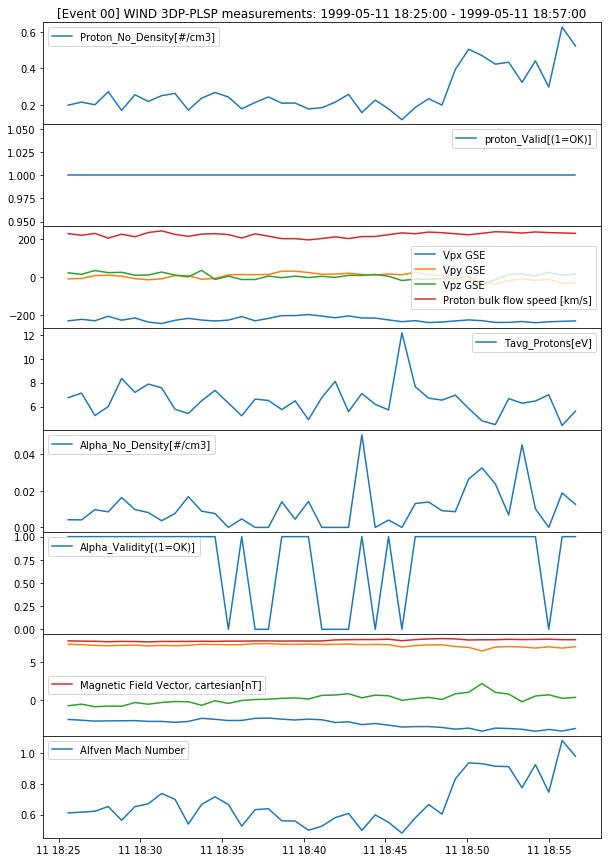

In [11]:
fig,axes = plt.subplots(8,figsize=(10,15))
plt.subplots_adjust(hspace=0)
ax = axes[0]
ax.set_title(f'[Event {i_event:02d}] WIND 3DP-PLSP measurements: {t_start} - {t_end}')
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$DENSITY'],label=f"{data_3DP['MOM$P$DENSITY'].attrs['LABLAXIS']}[{data_3DP['MOM$P$DENSITY'].attrs['UNITS']}]")
ax = axes[1]
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$VALID'],label=f"{data_3DP['MOM$P$VALID'].attrs['LABLAXIS']}[{data_3DP['MOM$P$VALID'].attrs['UNITS']}]")
ax = axes[2]
p_speed_3DP = np.linalg.norm(data_3DP['MOM$P$VELOCITY'],axis=1)
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$VELOCITY'][:,0],label='Vpx GSE')
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$VELOCITY'][:,1],label='Vpy GSE')
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$VELOCITY'][:,2],label='Vpz GSE')
ax.plot(data_3DP['Epoch'],p_speed_3DP,label=f"Proton bulk flow speed [{data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}]")
ax = axes[3]
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$AVGTEMP'],label=f"{data_3DP['MOM$P$AVGTEMP'].attrs['LABLAXIS']}[{data_3DP['MOM$P$AVGTEMP'].attrs['UNITS']}]")
ax = axes[4]
ax.plot(data_3DP['Epoch'],data_3DP['MOM$A$DENSITY'],label=f"{data_3DP['MOM$A$DENSITY'].attrs['LABLAXIS']}[{data_3DP['MOM$A$DENSITY'].attrs['UNITS']}]")
ax = axes[5]
ax.plot(data_3DP['Epoch'],data_3DP['MOM$A$VALID'],label=f"{data_3DP['MOM$A$VALID'].attrs['LABLAXIS']}[{data_3DP['MOM$A$VALID'].attrs['UNITS']}]")
ax = axes[6]
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$MAGF'])
mag_field_tr_interped_to_3DP = np.linalg.norm(data_3DP['MOM$P$MAGF'],axis=1)
ax.plot(data_3DP['Epoch'],mag_field_tr_interped_to_3DP,label=f"{data_3DP['MOM$P$MAGF'].attrs['FIELDNAM']}[{data_3DP['MOM$P$MAGF'].attrs['UNITS']}]")
ax = axes[7]

alfven_speed = (mag_field_tr_interped_to_3DP*nT_to_T)/np.sqrt(mu_0*m_proton*data_3DP['MOM$P$DENSITY']*per_cmCubic_to_per_mCubic)
alfven_speed = alfven_speed / 1000
alfven_mach = p_speed_3DP / alfven_speed
ax.plot(data_3DP['Epoch'],alfven_mach,label='Alfven Mach Number')

for ax in axes:
    ax.legend(loc='best')
    if ax!= axes[-1]:
        ax.set_xticks([])
        
plt.savefig('event_figures/event%02d-WIND-3DP-PLSP.png'%i_event,dpi=100)
_ = 0;

In [19]:
p_density_3DP_avg = np.mean(data_3DP['MOM$P$DENSITY'])
p_density_3DP_std = np.std(data_3DP['MOM$P$DENSITY'])
p_speed_3DP_avg = np.mean(p_speed_3DP)
p_speed_3DP_std = np.std(p_speed_3DP)
p_temperature_3DP_avg = np.mean(data_3DP['MOM$P$AVGTEMP'])
# average over the whole segment
alpha_density_3DP_avg = np.mean(data_3DP['MOM$A$DENSITY']*data_3DP['MOM$A$VALID']) # use $valid$
V_proton_x_GSE_3DP = np.mean(data_3DP['MOM$P$VELOCITY'][:,0])

print(f"p_density_3DP_avg: {p_density_3DP_avg:.4} {data_3DP['MOM$P$DENSITY'].attrs['UNITS']}")
print(f"p_density_3DP_std: {p_density_3DP_std:.4} {data_3DP['MOM$P$DENSITY'].attrs['UNITS']}")
print(f"p_speed_3DP_avg: {p_speed_3DP_avg:.4} {data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}")
print(f"p_speed_3DP_std: {p_speed_3DP_std:.4} {data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}")
print(f"p_temperature_3DP_avg: {p_temperature_3DP_avg:.4} {data_3DP['MOM$P$AVGTEMP'].attrs['UNITS']}")
print(f"alpha_density_3DP_avg: {alpha_density_3DP_avg:.4} {data_3DP['MOM$A$DENSITY'].attrs['UNITS']}")
print(f"V_proton_x_GSE_3DP: {V_proton_x_GSE_3DP:.4} {data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}")

selected_events.loc[i_event,'proton_density_3DP'] = p_density_3DP_avg
selected_events.loc[i_event,'proton_speed_3DP'] = p_speed_3DP_avg
selected_events.loc[i_event,'proton_temperature_3DP'] = p_temperature_3DP_avg
selected_events.loc[i_event,'alpha_density_3DP'] = alpha_density_3DP_avg
selected_events.loc[i_event,'V_proton_x_GSE_3DP'] = p_temperature_3DP_avg



p_density_3DP_avg: 0.2712 #/cm3
p_density_3DP_std: 0.1163 #/cm3
p_speed_3DP_avg: 224.8 km/s
p_speed_3DP_std: 12.2 km/s
p_temperature_3DP_avg: 6.513 eV
alpha_density_3DP_avg: 0.01069 #/cm3
V_proton_x_GSE_3DP: -223.5 km/s


# WIND 3DP-ELM

In [1917]:
%%time
variables_3DP_ELM = ['SC_POT','SC_CURRENT','MAGF','DENSITY','AVGTEMP','VTHERMAL','VELOCITY','FLUX','PTENS','MFTENS','T3','SYMM','SYMM_THETA','SYMM_PHI','SYMM_ANG','MAGT3','ERANGE','MASS','VALID','VEL_MAG','VEL_TH','VEL_PHI','TIME']
status_3DP_ELM, data_3DP_ELM = cdas.get_data('WI_ELM2_3DP', variables_3DP_ELM, t_start_localize, t_end_localize)

print(data_3DP_ELM.keys())

dict_keys(['Epoch', 'SC_POT', 'SC_CURRENT', 'MAGF', 'DENSITY', 'AVGTEMP', 'VTHERMAL', 'VELOCITY', 'FLUX', 'PTENS', 'MFTENS', 'T3', 'SYMM', 'SYMM_THETA', 'SYMM_PHI', 'SYMM_ANG', 'MAGT3', 'ERANGE', 'MASS', 'VALID', 'VEL_MAG', 'VEL_TH', 'VEL_PHI', 'TIME', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4', 'metavar5', 'metavar6', 'metavar7', 'metavar8'])
CPU times: user 96.7 ms, sys: 4.34 ms, total: 101 ms
Wall time: 2.96 s


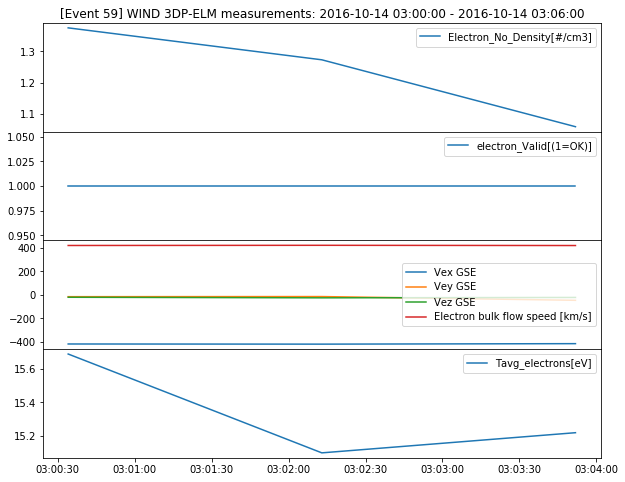

In [1918]:
fig, axes = plt.subplots(4, figsize=(10, 8))
plt.subplots_adjust(hspace=0)
ax = axes[0]
ax.set_title(f'[Event {i_event:02d}] WIND 3DP-ELM measurements: {t_start} - {t_end}')
ax.plot(
    data_3DP_ELM['Epoch'],data_3DP_ELM['DENSITY'],
    label=f"{data_3DP_ELM['DENSITY'].attrs['LABLAXIS']}[{data_3DP_ELM['DENSITY'].attrs['UNITS']}]"
)
ax = axes[1]
ax.plot(
    data_3DP_ELM['Epoch'],data_3DP_ELM['VALID'],
    label=f"{data_3DP_ELM['VALID'].attrs['LABLAXIS']}[{data_3DP_ELM['VALID'].attrs['UNITS']}]"
)
ax = axes[2]
e_speed_3DP = np.linalg.norm(data_3DP_ELM['VELOCITY'],axis=1)
ax.plot(data_3DP_ELM['Epoch'],data_3DP_ELM['VELOCITY'][:,0],label='Vex GSE')
ax.plot(data_3DP_ELM['Epoch'],data_3DP_ELM['VELOCITY'][:,1],label='Vey GSE')
ax.plot(data_3DP_ELM['Epoch'],data_3DP_ELM['VELOCITY'][:,2],label='Vez GSE')
ax.plot(data_3DP_ELM['Epoch'],e_speed_3DP,label=f"Electron bulk flow speed [{data_3DP_ELM['VELOCITY'].attrs['UNITS']}]")
ax = axes[3]
ax.plot(
    data_3DP_ELM['Epoch'],data_3DP_ELM['AVGTEMP'],
    label=f"{data_3DP_ELM['AVGTEMP'].attrs['LABLAXIS']}[{data_3DP_ELM['AVGTEMP'].attrs['UNITS']}]"
)

for ax in axes:
    ax.legend(loc='best')
    if ax != axes[-1]:
        ax.set_xticks([])
plt.savefig('event_figures/event%02d-WIND-3DP-ELM.png'%i_event,dpi=100)
_ = 0;

In [1919]:
e_density_3DP_avg = np.mean(data_3DP_ELM['DENSITY'])
e_density_3DP_std = np.std(data_3DP_ELM['DENSITY'])
e_speed_3DP_avg = np.mean(e_speed_3DP)
e_speed_3DP_std = np.std(e_speed_3DP)
e_temperature_3DP_avg = np.mean(data_3DP_ELM['AVGTEMP'])

print(f"e_density_3DP_avg: {e_density_3DP_avg:.4} {data_3DP_ELM['DENSITY'].attrs['UNITS']}")
print(f"e_density_3DP_std: {e_density_3DP_std:.4} {data_3DP_ELM['DENSITY'].attrs['UNITS']}")
print(f"e_speed_3DP_avg: {e_speed_3DP_avg:.4} {data_3DP_ELM['VELOCITY'].attrs['UNITS']}")
print(f"e_speed_3DP_std: {e_speed_3DP_std:.4} {data_3DP_ELM['VELOCITY'].attrs['UNITS']}")
print(f"e_temperature_3DP_avg: {e_temperature_3DP_avg:.4} {data_3DP_ELM['AVGTEMP'].attrs['UNITS']}")

selected_events.loc[i_event,'electron_density_3DP'] = e_density_3DP_avg
selected_events.loc[i_event,'electron_speed_3DP'] = e_speed_3DP_avg
selected_events.loc[i_event,'electron_temperature_3DP'] = e_temperature_3DP_avg

e_density_3DP_avg: 1.236 #/cm3
e_density_3DP_std: 0.1313 #/cm3
e_speed_3DP_avg: 419.6 km/s
e_speed_3DP_std: 0.8366 km/s
e_temperature_3DP_avg: 15.34 eV


# WIND MFI

In [1920]:
%%time
############################### 
# TODO
# check the PAD of each event.
############################### 

variables_MFI = ['BF1','BF1LOG','BRMSF1','BGSM','BRMSGSM','BGSE','BGSEa','BRMSGSE','DIST','PGSM','PGSE','B3F1','B3F1LOG','B3RMSF1','B3GSM','B3RMSGSM','B3GSE','B3GSEa','B3RMSGSE','B1F1','B1F1LOG','B1RMSF1','B1GSM','B1RMSGSM','B1GSE','B1GSEa','B1RMSGSE','DIST1','P1GSM','P1GSE','DISTV','PGSMV','PGSEV','DIST1V','P1GSMV','P1GSEV']
status_MFI, data_MFI = cdas.get_data('WI_H0_MFI', variables_MFI, t_start_localize, t_end_localize)
print(data_MFI.keys())

dict_keys(['Epoch', 'Epoch3', 'Epoch1', 'BF1', 'BF1LOG', 'BRMSF1', 'BGSM', 'BRMSGSM', 'BGSE', 'BGSEa', 'BRMSGSE', 'DIST', 'PGSM', 'PGSE', 'B3F1', 'B3F1LOG', 'B3RMSF1', 'B3GSM', 'B3RMSGSM', 'B3GSE', 'B3GSEa', 'B3RMSGSE', 'B1F1', 'B1F1LOG', 'B1RMSF1', 'B1GSM', 'B1RMSGSM', 'B1GSE', 'B1GSEa', 'B1RMSGSE', 'DIST1', 'P1GSM', 'P1GSE', 'DISTV', 'PGSMV', 'PGSEV', 'DIST1V', 'P1GSMV', 'P1GSEV', 'cartesian', 'angle', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4', 'metavar5', 'metavar6', 'metavar7', 'metavar8', 'metavar9'])
CPU times: user 153 ms, sys: 7.16 ms, total: 160 ms
Wall time: 3.83 s


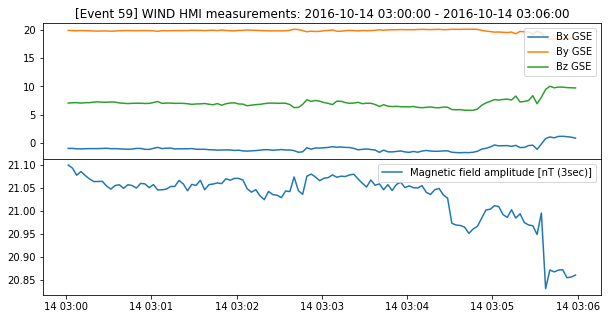

In [1921]:
B_GSE_MFI = data_MFI['B3GSE']
B_GSE_MFI[B_GSE_MFI<-1e6] = np.nan

fig, axes = plt.subplots(2, figsize=(10, 5))
plt.subplots_adjust(hspace=0)

ax = axes[0]
ax.set_title(f'[Event {i_event:02d}] WIND HMI measurements: {t_start} - {t_end}')
ax.plot(data_MFI['Epoch3'],data_MFI['B3GSE'][:,0],label='Bx GSE')
ax.plot(data_MFI['Epoch3'],data_MFI['B3GSE'][:,1],label='By GSE')
ax.plot(data_MFI['Epoch3'],data_MFI['B3GSE'][:,2],label='Bz GSE')
ax = axes[1]
magnetic_field_amp_MFI = np.linalg.norm(data_MFI['B3GSE'],axis=1)
ax.plot(data_MFI['Epoch3'],magnetic_field_amp_MFI,
        label=f"Magnetic field amplitude [{data_MFI['B3GSE'].attrs['UNITS']}]"
) # 3 denotes 3 sec cadence (without 3 denotes 1 min)

for ax in axes:
    ax.legend(loc='best')
    if ax != axes[-1]:
        ax.set_xticks([])
plt.savefig('event_figures/event%02d-WIND-HMI.png'%i_event,dpi=100)
_ = 0;

In [1922]:
pos_GSE_WIND = data_MFI['PGSEV']
pos_GSE_WIND[pos_GSE_WIND<-1e6] = np.nan

x_GSE_HMI,y_GSE_HMI,z_GSE_HMI = np.nanmean(data_MFI['PGSEV'],axis=0)
selected_events.loc[i_event,'x_GSE_WIND']=x_GSE_HMI
selected_events.loc[i_event,'y_GSE_WIND']=y_GSE_HMI
selected_events.loc[i_event,'z_GSE_WIND']=z_GSE_HMI

B_total_HMI_avg = np.nanmean(magnetic_field_amp_MFI)
print(f"B_total_HMI_avg: {B_total_HMI_avg:.4} {data_MFI['B3GSE'].attrs['UNITS']}")
selected_events.loc[i_event,'B_total_WIND'] = B_total_HMI_avg

# Here we do not simply log the value of B. We also mind the trend of the B vector.

B_total_HMI_avg: 21.03 nT (3sec)


# ACE SWE

In [1923]:
%%time
variables_SWE = ['Np','Vp','Tpr','alpha_ratio','V_GSE','V_RTN','V_GSM','SC_pos_GSE','SC_pos_GSM']
status_SWE, data_SWE = cdas.get_data('AC_H0_SWE', variables_SWE, t_start_localize, t_end_localize)
print(data_MFI.keys())
# 1 min cadence

dict_keys(['Epoch', 'Epoch3', 'Epoch1', 'BF1', 'BF1LOG', 'BRMSF1', 'BGSM', 'BRMSGSM', 'BGSE', 'BGSEa', 'BRMSGSE', 'DIST', 'PGSM', 'PGSE', 'B3F1', 'B3F1LOG', 'B3RMSF1', 'B3GSM', 'B3RMSGSM', 'B3GSE', 'B3GSEa', 'B3RMSGSE', 'B1F1', 'B1F1LOG', 'B1RMSF1', 'B1GSM', 'B1RMSGSM', 'B1GSE', 'B1GSEa', 'B1RMSGSE', 'DIST1', 'P1GSM', 'P1GSE', 'DISTV', 'PGSMV', 'PGSEV', 'DIST1V', 'P1GSMV', 'P1GSEV', 'cartesian', 'angle', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4', 'metavar5', 'metavar6', 'metavar7', 'metavar8', 'metavar9'])
CPU times: user 201 ms, sys: 7.78 ms, total: 209 ms
Wall time: 2.89 s


In [1924]:
proton_density_SWE = data_SWE['Np']
proton_density_SWE[proton_density_SWE<-1e5] = np.nan # will change the variable data_SWE['Np']
proton_speed_SWE = data_SWE['Vp']
proton_speed_SWE[proton_speed_SWE<-1e5] = np.nan
proton_temperature_SWE = data_SWE['Tpr']
proton_temperature_SWE[proton_temperature_SWE<-1e5] = np.nan
proton_temperature_SWE_in_eV = proton_temperature_SWE / eV_to_Kelvin
alpha_ratio_SWE = data_SWE['alpha_ratio']
alpha_ratio_SWE[alpha_ratio_SWE<-1e5] = np.nan
alpha_density_SWE = proton_density_SWE*alpha_ratio_SWE

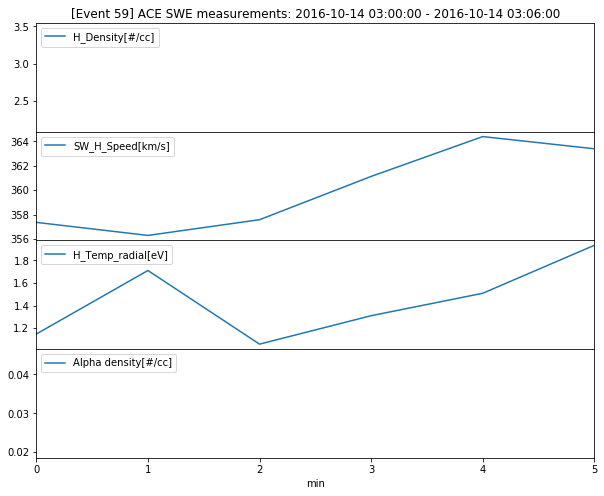

In [1925]:
fig, axes = plt.subplots(4, figsize=(10, 8))
plt.subplots_adjust(hspace=0)

t_SWE = list(range(len(proton_density_SWE)))
ax = axes[0]
ax.set_title(f'[Event {i_event:02d}] ACE SWE measurements: {t_start} - {t_end}')
ax.plot(t_SWE,data_SWE['Np'],label=f"{data_SWE['Np'].attrs['LABLAXIS']}[{data_SWE['Np'].attrs['UNITS']}]")
ax = axes[1]
ax.plot(t_SWE,data_SWE['Vp'],label=f"{data_SWE['Vp'].attrs['LABLAXIS']}[{data_SWE['Vp'].attrs['UNITS']}]")
ax = axes[2]
ax.plot(t_SWE,proton_temperature_SWE_in_eV,label=f"{data_SWE['Tpr'].attrs['LABLAXIS']}[eV]")
ax = axes[3]
ax.plot(t_SWE,alpha_density_SWE,label='Alpha density[#/cc]')


for ax in axes:
    ax.legend(loc='best')
    ax.set_xlim(t_SWE[0],t_SWE[-1])
    if ax != axes[-1]:
        ax.set_xticks([])
axes[-1].set_xlabel('min')
plt.savefig('event_figures/event%02d-ACE-SWE.png'%i_event,dpi=100)
_ = 0;

In [1926]:
x_GSE_SWE,y_GSE_SWE,z_GSE_SWE = np.mean(data_SWE['SC_pos_GSE']/R_earth,axis=0)
proton_density_SWE_avg = np.nansum(proton_density_SWE)/len(proton_density_SWE)
if proton_density_SWE_avg < 1e-6:
    selected_events.loc[i_event,'proton_density_SWE'] = np.nan
else:
    selected_events.loc[i_event,'proton_density_SWE'] = proton_density_SWE_avg
    
selected_events.loc[i_event,'proton_speed_SWE'] = np.nansum(proton_speed_SWE)/len(proton_speed_SWE)
proton_temperature_SWE_in_eV_avg = np.nansum(proton_temperature_SWE_in_eV)/len(proton_temperature_SWE_in_eV)
if proton_temperature_SWE_in_eV_avg < 1e-6:
    selected_events.loc[i_event,'proton_temperature_SWE'] = np.nan
else:
    selected_events.loc[i_event,'proton_temperature_SWE'] = proton_temperature_SWE_in_eV_avg

alpha_density_SWE_avg = np.nansum(alpha_density_SWE)/len(alpha_density_SWE)
if alpha_density_SWE_avg < 1e-6:
    selected_events.loc[i_event,'alpha_density_SWE'] = np.nan
else:
    selected_events.loc[i_event,'alpha_density_SWE'] = alpha_density_SWE_avg
selected_events.loc[i_event,'x_GSE_ACE']=x_GSE_SWE
selected_events.loc[i_event,'y_GSE_ACE']=y_GSE_SWE
selected_events.loc[i_event,'z_GSE_ACE']=z_GSE_SWE

# ACE SWI

In [1927]:
# AC_H2_SWI: ACE/SWICS 1.1 Solar Wind 1-Hour Level 2 Data - G. Gloeckler (University of Maryland)
# [Available Time Range: 1998/02/04 00:09:16 - 2011/08/21 22:40:54]  Info  Metadata

# AC_H3_SW2: ACE/SWICS 2.0 Solar Wind 2-Hour Level 2 Data - G. Gloeckler (University of Maryland)
# [Available Time Range: 2012/06/01 00:40:44 - 2020/04/09 22:33:35]  Info  Metadata
t_AC_H2_SWI_end = datetime.datetime(2011,8,21,22,40,54)
t_AC_H3_SW2_start = datetime.datetime(2012,6,1,0,40,44)
if (t_end - t_AC_H2_SWI_end).value < 0:
    name_database = 'AC_H2_SWI' # 1hr cadence
elif (t_start - t_AC_H3_SW2_start).value > 0:
    name_database = 'AC_H3_SW2' # 2hr cadence
else:
    raise ValueError
print(f"Event: {t_start} - {t_end}, using {name_database}")

Event: 2016-10-14 03:00:00 - 2016-10-14 03:06:00, using AC_H3_SW2


In [1928]:
if name_database == 'AC_H2_SWI':
    if selected_events.duration[i_event]<60:
        # extend time interval
        t_middle = t_start + (t_start - t_end) / 2
        t_start_extended = t_middle - datetime.timedelta(minutes=30)
        t_end_extended = t_middle + datetime.timedelta(minutes=30)
        t_start_extended_localize = t_start_extended.tz_localize(tz='UTC')
        t_end_extended_localize = t_end_extended.tz_localize(tz='UTC')
    else:
        t_start_extended_localize = t_start_localize
        t_end_extended_localize = t_end_localize
if name_database == 'AC_H3_SW2':
    # extend time interval (if duration < 120 mins, which all events satisfy)
    t_middle = t_start + (t_start - t_end) / 2
    t_start_extended = t_middle - datetime.timedelta(minutes=60)
    t_end_extended = t_middle + datetime.timedelta(minutes=60)
    t_start_extended_localize = t_start_extended.tz_localize(tz='UTC')
    t_end_extended_localize = t_end_extended.tz_localize(tz='UTC')

In [1929]:
%%time
if name_database == 'AC_H2_SWI':
    variables_SWI = ['nHe2','nHe2_err','vHe2','vthHe2','He_qual','vC5','vthC5','C5_qual','vO6','vthO6','O6_qual','vFe10','vthFe10','Fe10_qual','C6to4','C6to4_err','C6to4_qual','C6to5','C6to5_err','C6to5_qual','O7to6','O7to6_err','O7to6_qual','avqC','avqC_err','avqC_qual','avqO','avqO_err','avqO_qual','avqMg','avqMg_err','avqMg_qual','avqSi','avqSi_err','avqSi_qual','avqFe','avqFe_err','avqFe_qual','FetoO','FetoO_err','FetoO_qual','SW_type']
    status_SWI, data_SWI = cdas.get_data(name_database, variables_SWI, t_start_extended_localize, t_end_extended_localize)
    
if name_database == 'AC_H3_SW2':
    variables_SWI = ['vHe2','vthHe2','He_qual','C6to5','C6to5_err','C6to5_qual','O7to6','O7to6_err','O7to6_qual','O8to6','O8to6_err','O8to6_qual','avqFe','avqFe_err','avqFe_qual','FetoO','FetoO_err','FetoO_qual']
    status_SWI, data_SWI = cdas.get_data(name_database, variables_SWI, t_start_extended_localize, t_end_extended_localize)

print(data_SWI.keys())

dict_keys(['Epoch', 'vHe2', 'vthHe2', 'He_qual', 'C6to5', 'C6to5_err', 'C6to5_qual', 'O7to6', 'O7to6_err', 'O7to6_qual', 'O8to6', 'O8to6_err', 'O8to6_qual', 'avqFe', 'avqFe_err', 'avqFe_qual', 'FetoO', 'FetoO_err', 'FetoO_qual'])
CPU times: user 62.1 ms, sys: 3.56 ms, total: 65.7 ms
Wall time: 1.65 s


In [1930]:
# quality: 0 >> good quality
if name_database == 'AC_H2_SWI': # 'AC_H3_SW2' does not offer.
    print(data_SWI['nHe2'].attrs['LABLAXIS'],data_SWI['nHe2'],data_SWI['nHe2'].attrs['UNITS'])
    print('SW_type:',data_SWI['SW_type'])
    # 0:streamer 1:coronal hole 2:CME 3:unidentified 
print(data_SWI['He_qual'].attrs['LABLAXIS'],data_SWI['He_qual'])
print(data_SWI['C6to5'].attrs['LABLAXIS'],data_SWI['C6to5'],data_SWI['C6to5_err'].attrs['LABLAXIS'],data_SWI['C6to5_err'])
print(data_SWI['O7to6'].attrs['LABLAXIS'],data_SWI['O7to6'],data_SWI['O7to6_err'].attrs['LABLAXIS'],data_SWI['O7to6_err'])
print(data_SWI['avqFe'].attrs['LABLAXIS'],data_SWI['avqFe'],data_SWI['avqFe_err'].attrs['LABLAXIS'],data_SWI['avqFe_err'])


QF_He [0]
C+6/C+5_Ratio [1.0195] C+6/C+5_Ratio_Err [1.3948]
O+7/O+6_Ratio [0.21001] O+7/O+6_Ratio_Err [1.3952]
<Q>_Fe [10.141] <Q>_Fe_Err [0.17093]


In [1931]:
if name_database == 'AC_H2_SWI': # 'AC_H3_SW2' does not offer.
    selected_events.loc[i_event,'SW_type_SWI'] = data_SWI['SW_type']
    alpha_density_SWI = (data_SWI['He_qual'] == 0)*data_SWI['nHe2']
    alpha_density_SWI[alpha_density_SWI<1e-10] = np.nan
    if np.logical_not(np.isnan(alpha_density_SWI)).sum()>0: 
        alpha_density_SWI_avg = np.nansum(alpha_density_SWI) /len(alpha_density_SWI)
    else:
        alpha_density_SWI_avg = np.nan
    selected_events.loc[i_event,'alpha_density_SWI'] = alpha_density_SWI_avg
if name_database == 'AC_H3_SW2':
    selected_events.loc[i_event,'SW_type_SWI'] = np.nan
    selected_events.loc[i_event,'alpha_density_SWI'] = np.nan

C6toC5_ratio_SWI = data_SWI['C6to5']
C6toC5_ratio_SWI[C6toC5_ratio_SWI<-1e6] = np.nan
C6toC5_ratio_SWI_avg = np.nansum(C6toC5_ratio_SWI)/len(C6toC5_ratio_SWI)
if C6toC5_ratio_SWI_avg < 1e-6:
    selected_events.loc[i_event,'C6toC5_ratio_SWI'] = np.nan
else:
    selected_events.loc[i_event,'C6toC5_ratio_SWI'] = C6toC5_ratio_SWI_avg

O7toO6_ratio_SWI = data_SWI['O7to6']
O7toO6_ratio_SWI[O7toO6_ratio_SWI<-1e6] = np.nan
O7toO6_ratio_SWI_avg = np.nansum(O7toO6_ratio_SWI)/len(O7toO6_ratio_SWI)
if O7toO6_ratio_SWI_avg < 1e-6:
    selected_events.loc[i_event,'O7toO6_ratio_SWI'] = np.nan
else:
    selected_events.loc[i_event,'O7toO6_ratio_SWI'] = O7toO6_ratio_SWI_avg

Q_avg_Fe_SWI = data_SWI['avqFe']
Q_avg_Fe_SWI[Q_avg_Fe_SWI<-1e6] = np.nan
Q_avg_Fe_SWI_avg = np.nansum(Q_avg_Fe_SWI)/len(Q_avg_Fe_SWI)
if Q_avg_Fe_SWI_avg < 1e-6:
    selected_events.loc[i_event,'Q_avg_Fe_SWI'] = np.nan
else:
    selected_events.loc[i_event,'Q_avg_Fe_SWI'] = Q_avg_Fe_SWI_avg

# ACE MFI

In [1932]:
%%time
variables_ACEMFI = ['Magnitude','BGSEc','BGSM','SC_pos_GSE','SC_pos_GSM']
status_ACEMFI, data_ACEMFI = cdas.get_data('AC_H1_MFI', variables_ACEMFI, t_start_localize, t_end_localize)
print(data_ACEMFI.keys())

dict_keys(['Epoch', 'Magnitude', 'BGSEc', 'BGSM', 'SC_pos_GSE', 'SC_pos_GSM', 'cartesian', 'metavar0', 'metavar1', 'metavar2', 'metavar3'])
CPU times: user 42.9 ms, sys: 4.11 ms, total: 47 ms
Wall time: 2.49 s


Text(0.5, 1.0, '[Event 59] ACE HMI measurements: 2016-10-14 03:00:00 - 2016-10-14 03:06:00')

[]

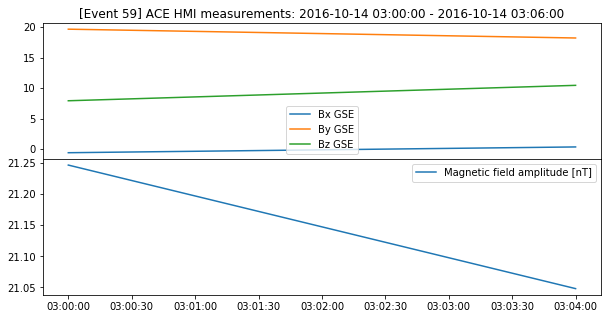

In [1933]:
if np.shape(data_ACEMFI['BGSEc']) ==(3,):
    print(data_ACEMFI['BGSEc'])
else:
    fig, axes = plt.subplots(2, figsize=(10, 5))
    plt.subplots_adjust(hspace=0)

    ax = axes[0]
    ax.set_title(f'[Event {i_event:02d}] ACE HMI measurements: {t_start} - {t_end}')
    ax.plot(data_ACEMFI['Epoch'],data_ACEMFI['BGSEc'][:,0],label='Bx GSE')
    ax.plot(data_ACEMFI['Epoch'],data_ACEMFI['BGSEc'][:,1],label='By GSE')
    ax.plot(data_ACEMFI['Epoch'],data_ACEMFI['BGSEc'][:,2],label='Bz GSE')
    ax = axes[1]
    ax.plot(data_ACEMFI['Epoch'],data_ACEMFI['Magnitude'],
            label=f"Magnetic field amplitude [{data_ACEMFI['Magnitude'].attrs['UNITS']}]"
    ) 

    for ax in axes:
        ax.legend(loc='best')
        if ax != axes[-1]:
            ax.set_xticks([])
    plt.savefig('event_figures/event%02d-ACE-HMI.png'%i_event,dpi=100)
_ = 0;

In [1934]:
B_total_ACEHMI_avg = np.mean(data_ACEMFI['Magnitude'])
print(f"B_total_ACEHMI_avg: {B_total_ACEHMI_avg:.4} [{data_ACEMFI['Magnitude'].attrs['UNITS']}]")
selected_events.loc[i_event,'B_total_ACE'] = B_total_ACEHMI_avg

# Here we do not simply log the value of B. We also mind the trend of the B vector.

B_total_ACEHMI_avg: 21.15 [nT]


In [1935]:
selected_events.iloc[i_event]

start                       2016-10-14 03:00:00
end                         2016-10-14 03:06:00
duration                                      7
num_of_log                                    7
fill_rate                                     1
proton_density_3DP                      1.70424
proton_speed_3DP                        365.046
proton_temperature_3DP                  6.44003
alpha_density_3DP                     0.0121522
electron_density_3DP                    1.23632
electron_speed_3DP                      419.593
electron_temperature_3DP                15.3351
x_GSE_WIND                              245.633
y_GSE_WIND                             -73.6046
z_GSE_WIND                              13.9413
x_GSE_ACE                               230.249
y_GSE_ACE                               39.9287
z_GSE_ACE                              -10.0099
proton_density_SWE                      0.93925
proton_speed_SWE                        360.027
proton_temperature_SWE                  

# Tracing back

In [1793]:
np.isnan(np.array([np.nan, 1, np.nan]))
np.logical_not(np.isnan(np.array([np.nan, 1, np.nan])))

array([ True, False,  True])

array([False,  True, False])